# Lab 6 - Model comparison
### Mateusz Floras

In [103]:
from cmdstanpy import CmdStanModel
import arviz as az
import matplotlib.pyplot as plt

### Exercise 1

In [104]:
F = len("Mateusz")
L = len("Floras")
N = (L+F)*100

In [105]:
model_1=CmdStanModel(stan_file='code_1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [106]:
sim_1=model_1.sample(data={'N': N}, iter_sampling=1, iter_warmup=0, chains=1, fixed_param=True)
sim_1_df = sim_1.draws_pd()
sim_1_df.head()

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,theta,y[1],y[2],y[3],y[4],y[5],y[6],y[7],...,y[1291],y[1292],y[1293],y[1294],y[1295],y[1296],y[1297],y[1298],y[1299],y[1300]
0,0.0,0.0,0.01,1.76339,-0.774196,1.22628,1.33592,-0.621769,-0.53295,-0.109243,...,-0.442286,-1.50366,1.35953,-1.21105,1.39971,0.217959,1.12763,-15.8816,0.422107,1.79333


In [107]:
model_2=CmdStanModel(stan_file='code_2.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [108]:
sim_2=model_2.sample(data={'N': N}, iter_sampling=1, iter_warmup=0, chains=1, fixed_param=True)
sim_2_df = sim_2.draws_pd()
sim_2_df.head()

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,"X[1,1]","X[2,1]","X[3,1]","X[4,1]","X[5,1]","X[6,1]","X[7,1]","X[8,1]",...,y[1291],y[1292],y[1293],y[1294],y[1295],y[1296],y[1297],y[1298],y[1299],y[1300]
0,0.0,0.0,-0.34884,-0.689203,-1.33304,-0.90225,-0.045892,1.42594,0.423249,1.07297,...,1.2965,3.0057,-4.71347,1.69754,-0.599454,-4.27029,2.9683,4.26997,-0.054521,3.57645


### Exercise 2

In [109]:
model_3=CmdStanModel(stan_file='code_3.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [110]:
df1 = sim_1_df.loc[:, 'y[1]': 'y[{}]'.format(N)].values.reshape(N)

In [111]:
sim_3 = model_3.sample(data={'N': N, 'y': df1})
sim_3_df = sim_3.draws_pd()
sim_3_df.head()

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status



chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)



chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▋ | 00:01 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████▌| 00:01 Iteration: 1800 / 2000 [ 90%]  (Sampling)




chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed                       
chain 3 |██████████| 00:02 Sampling completed                       
chain 4 |██████████| 00:02 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,sigma,mu,log_lik[1],...,y_hat[1291],y_hat[1292],y_hat[1293],y_hat[1294],y_hat[1295],y_hat[1296],y_hat[1297],y_hat[1298],y_hat[1299],y_hat[1300]
0,-2501.10,0.683934,0.911355,2.0,3.0,0.0,2505.63,1.65193,0.042208,-1.96368,...,-2.702150,-0.549755,0.577384,0.314036,2.430080,-0.312565,-1.202540,-0.113691,2.73452,-1.038430
1,-2500.90,0.984146,0.911355,2.0,3.0,0.0,2501.30,1.63926,0.070382,-1.94651,...,-2.100020,-1.715230,1.112800,-1.001560,-1.077220,3.403370,0.195748,-1.977920,1.69682,-0.358115
2,-2501.17,0.904906,0.911355,2.0,3.0,0.0,2501.72,1.68505,0.078746,-1.94049,...,-0.471645,0.289556,1.499270,-0.491703,-0.972892,0.322314,2.958200,0.803903,1.09928,0.009566
3,-2500.92,0.989366,0.911355,2.0,3.0,0.0,2501.36,1.66110,0.054779,-1.95543,...,0.846097,-2.129090,-3.536910,1.877900,0.275212,1.922310,0.334688,-1.635650,0.68461,1.762340
4,-2500.84,0.967493,0.911355,1.0,3.0,0.0,2501.20,1.65136,0.096621,-1.92991,...,1.249140,1.590560,0.459260,-1.155510,1.764610,-0.936737,0.118735,3.886790,2.39954,-0.241361


In [112]:
model_4=CmdStanModel(stan_file='code_4.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [113]:
sim_4 = model_4.sample(data={'N': N, 'y': df1})
sim_4_df = sim_4.draws_pd()
sim_4_df.head()

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status

chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)











chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)



chain 1 |███████▋  | 00:11 Iteration: 1400 / 2000 [ 70%]  (Sampling)






chain 1 |████████▏ | 00:23 Iteration: 1500 / 2000 [ 75%]  (Sampling)

chain 1 |████████▋ | 00:27 Iteration: 1600 / 2000 [ 80%]  (Sampling)

chain 1 |█████████▌| 00:37 Iteration: 1800 / 2000 [ 90%]  (Sampling)



chain 1 |██████████| 00:43 Sampling completed                       
chain 2 |██████████| 00:43 Sampling completed                       
chain 3 |██████████| 00:43 Sampling completed                       
chain 4 |██████████| 00:43 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,sigma,mu,nu,...,y_hat[1291],y_hat[1292],y_hat[1293],y_hat[1294],y_hat[1295],y_hat[1296],y_hat[1297],y_hat[1298],y_hat[1299],y_hat[1300]
0,-1966.91,1.000000,0.61611,2.0,7.0,0.0,1968.04,0.849932,-0.011188,3.90957,...,-0.774131,0.288109,0.003170,0.661552,-1.363240,-5.478520,0.854656,0.679557,0.702958,0.278854
1,-1967.38,0.880112,0.61611,3.0,7.0,0.0,1968.65,0.834613,0.029952,4.44315,...,-0.139922,-1.715160,-0.943428,0.608149,-0.432740,9.711470,-0.407148,-0.627555,0.545038,1.156930
2,-1966.52,1.000000,0.61611,3.0,7.0,0.0,1967.72,0.870821,-0.025382,4.40255,...,-0.656413,1.544400,-0.115490,-0.225519,0.294682,0.264008,-2.134710,1.885880,-1.930530,0.175884
3,-1966.73,0.979744,0.61611,3.0,7.0,0.0,1967.53,0.874113,0.035734,4.34495,...,1.663680,-0.217925,-0.169221,0.826117,0.262189,-0.071226,-0.140385,0.652373,-0.957264,-2.982610
4,-1966.70,0.918837,0.61611,2.0,7.0,0.0,1968.18,0.890115,-0.009746,4.89661,...,-0.241793,2.871230,-0.019990,-0.098851,0.883227,-0.503527,-0.506734,-0.229758,0.671967,0.886973


In [114]:
models_34 = {'normal model': sim_3, 'student model': sim_4}
loo_comparison = az.compare(models_34, ic='loo')
loo_comparison.head()

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
student model,0,-1968.160075,5.040485,0.000000,1.000000e+00,40.200652,0.000000,False,log
normal model,1,-2528.004912,49.724559,559.844837,4.819952e-09,217.611984,193.018369,True,log


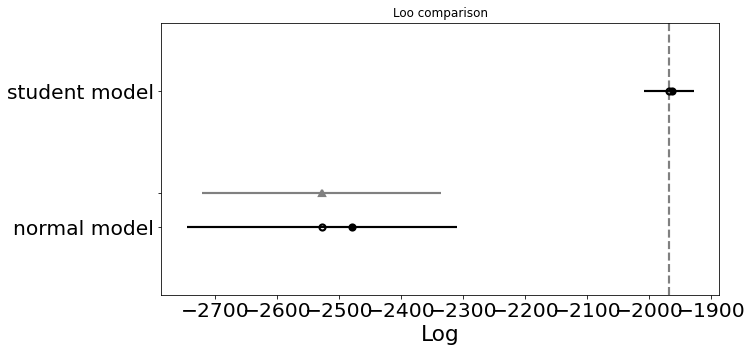

In [115]:
az.plot_compare(comp_df=loo_comparison, figsize=(10,5))
plt.title("Loo comparison")
plt.show()

In [116]:
waic_comparison = az.compare(models_34, ic='waic')
waic_comparison.head()

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
student model,0,-1968.120893,5.001303,0.000000,1.000000e+00,40.187687,0.000000,True,log
normal model,1,-2542.359457,64.079103,574.238564,5.112923e-09,229.913073,205.752879,True,log


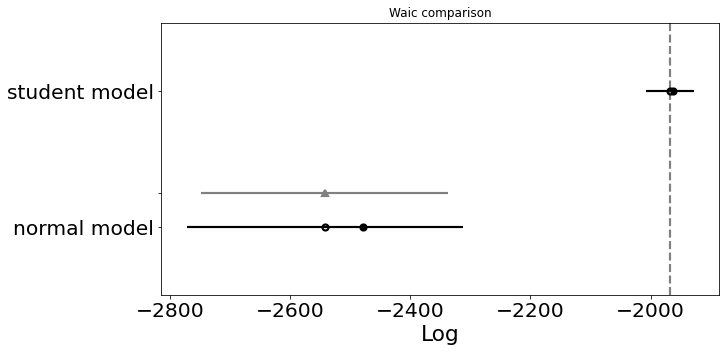

In [117]:
az.plot_compare(comp_df=waic_comparison, figsize=(10,5))
plt.title("Waic comparison")
plt.show()

Based on results of analysis using LOO and WAIC criteria, the better one is student model.

### Exercise 3

In [118]:
model_5=CmdStanModel(stan_file='code_5.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [119]:
df2 = sim_2_df.loc[:, 'y[1]': 'y[{}]'.format(N)].values.reshape(N)
x_1_df = sim_2_df.loc[:, 'X[1,1]': 'X[{},1]'.format(N)].values.reshape((N, 1))
data_5_1 = {'N': N, 'K': 1, 'y': df2, 'X': x_1_df}
sim_5_1 = model_5.sample(data=data_5_1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▍         | 00:00 Status


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)

chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)

chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)





chain 1 |█████████ | 00:03 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:04 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:04 Sampling completed                       
chain 2 |██████████| 00:04 Sampling completed                       
chain 3 |██████████| 00:04 Sampling completed                       
chain 4 |██████████| 00:04 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [120]:
x_2_df = sim_2_df.loc[:, 'X[1,1]': 'X[{},2]'.format(N)].values.reshape((N, 2))
data_5_2 = {'N': N, 'K': 2, 'y': df2, 'X': x_2_df}
sim_5_2 = model_5.sample(data=data_5_2)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)
chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)




chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)
chain 1 |████████▋ | 00:03 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:03 Iteration: 1700 / 2000 [ 85%]  (Sampling)




chain 1 |█████████▌| 00:04 Iteration: 1800 / 2000 [ 90%]  (Sampling)

chain 1 |██████████| 00:04 Sampling completed                       
chain 2 |██████████| 00:04 Sampling completed                       
chain 3 |██████████| 00:04 Sampling completed  


INFO:cmdstanpy:CmdStan done processing.


In [121]:
x_3_df = sim_2_df.loc[:, 'X[1,1]': 'X[{},3]'.format(N)].values.reshape((N, 3))
data_5_3 = {'N': N, 'K': 3, 'y': df2, 'X': x_3_df}
sim_5_3 = model_5.sample(data=data_5_3)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)





chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)




chain 1 |██████▊   | 00:03 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▋  | 00:09 Iteration: 1400 / 2000 [ 70%]  (Sampling)



chain 1 |████████▏ | 00:11 Iteration: 1500 / 2000 [ 75%]  (Sampling)

chain 1 |████████▋ | 00:13 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:14 Iteration: 1700 / 2000 [ 85%]  (Sampling)

chain 1 |█████████▌| 00:18 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:19 Iteration: 1900 / 2000 [ 95%]  (Sampling)

chain 1 |██████████| 00:21 Sampling completed                       
chain 2 |██████████| 00:21 Sampling completed                       
chain 3 |██████████| 00:21 Sampling completed                       
chain 4 |██████████| 00:21 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [122]:
models_5 = {'1 predictor': sim_5_1, '2 predictors': sim_5_2, '3 predictors': sim_5_3}

In [123]:
loo_comparison = az.compare(models_5, ic='loo')
loo_comparison.head()

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
1 predictor,0,-2349.082417,1.956582,0.000000,0.999623,25.358700,0.000000,False,log
3 predictors,1,-3057.205495,3.912097,708.123078,0.000377,25.655156,30.070094,False,log
2 predictors,2,-3058.669419,3.084717,709.587002,0.000000,25.394299,29.968703,False,log


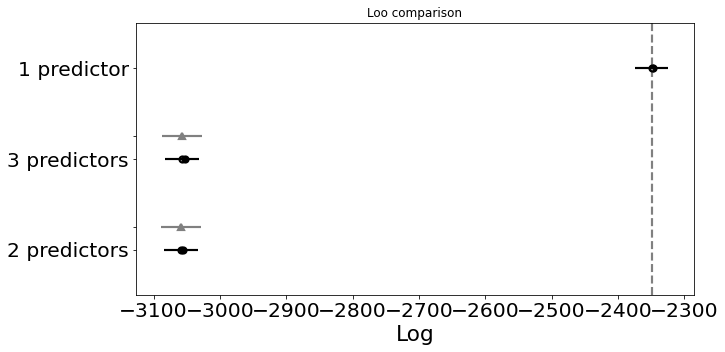

In [124]:
az.plot_compare(comp_df=loo_comparison, figsize=(10,5))
plt.title("Loo comparison")
plt.show()

In [125]:
waic_comparison = az.compare(models_5, ic='waic')
waic_comparison.head()

,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
1 predictor,0,-2349.082391,1.956556,0.000000,0.999623,25.358694,0.000000,False,log
3 predictors,1,-3057.205310,3.911912,708.122920,0.000377,25.655135,30.070079,False,log
2 predictors,2,-3058.669227,3.084526,709.586836,0.000000,25.394266,29.968681,False,log


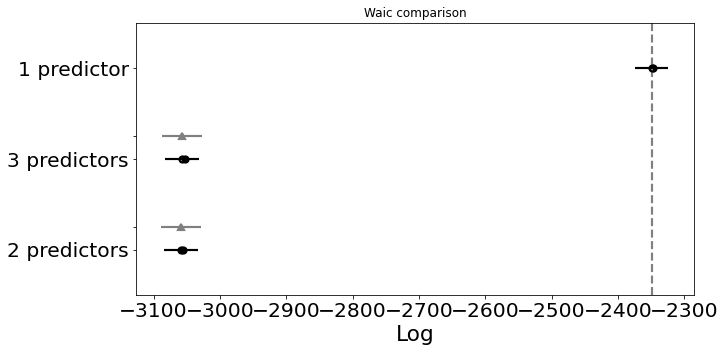

In [126]:
az.plot_compare(comp_df=waic_comparison, insample_dev=True,figsize=(10,5))
plt.title("Waic comparison")
plt.show()

Based on LOO and WAC criteria, the best one is the model with 1 predictor. Results of analysis models with 2 or 3 predictors are very similar to each other.